# Introduction to Qiskit - 2nd November 2023
 
Presented by: Astri Cornish

In [14]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")

# Invoke a primitive. For more details see https://qiskit.org/documentation/partners/qiskit_ibm_runtime/tutorials.html
# result = Sampler("ibmq_qasm_simulator").run(circuits).result()

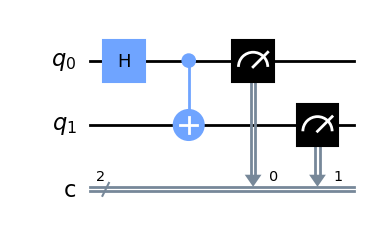

In [15]:
# Copied from IBM Quantum Composer

from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.h(qreg_q[0]) # h gate on 1st qubit
circuit.cx(qreg_q[0], qreg_q[1]) # control, target
circuit.measure(qreg_q[0], creg_c[0]) # measure qubit 1 onto classical bit 1
circuit.measure(qreg_q[1], creg_c[1]) # measure qubit 2 onto bit 2

circuit.draw()

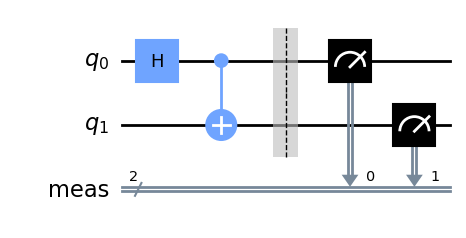

In [16]:
# condensed notation
circuit = QuantumCircuit(2)
circuit.h(0)
circuit.cx(0, 1)
circuit.measure_all()
circuit.draw()

### Running on a simulator (local simulator)

In [17]:
from qiskit_aer import AerSimulator

# running on a simulator
sim = AerSimulator()
job = sim.run(circuit) # shots = 1024 is the default
result = job.result() 
counts = result.get_counts() 
counts

{'00': 521, '11': 503}

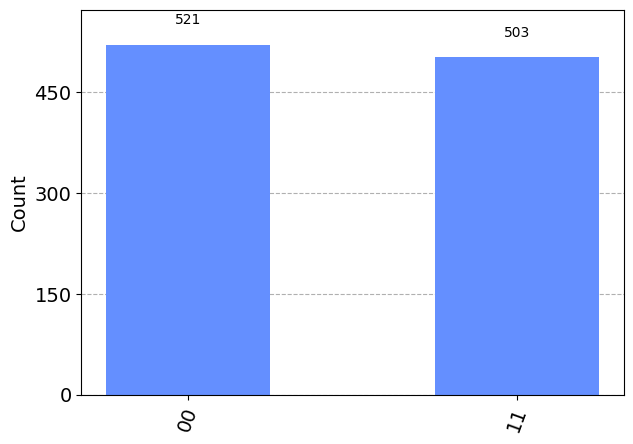

In [18]:
plot_histogram(counts)

### Running on a real quantum device using the Sampler Primitive

In [20]:
# Running on a real device

service = QiskitRuntimeService(channel='ibm_quantum')

real_backend = "ibmq_kolkata"

# set up options (think of this like execution configs)
options = Options(resilience_level=0) # can specify resilience_level here

with Session(service=service, backend=real_backend):
    sampler = Sampler(options=options)
    job = sampler.run([circuit], shots = 4000)
    results = job.result()
    quasi_dist = results.quasi_dists[0]
    

In [21]:
quasi_dist = quasi_dist.binary_probabilities()
quasi_dist

{'00': 0.46725, '01': 0.00975, '10': 0.015, '11': 0.508}

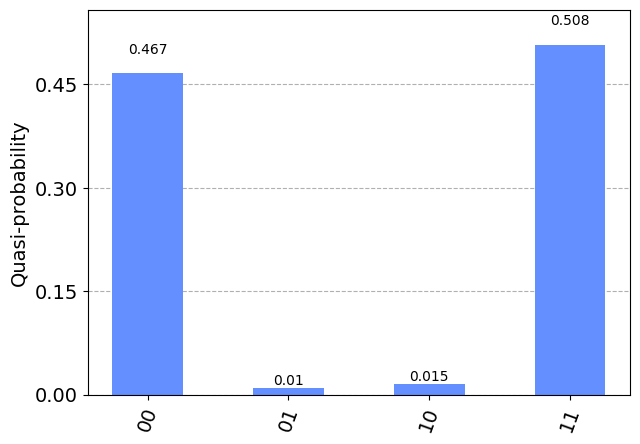

In [22]:
plot_histogram(quasi_dist)